In [ ]:
path = '../../Data/data/'

In [1]:
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile


## Now load the questionnaire related data from OUH and AUH 

In [2]:
#load the GN data files from AUH and OUH
with open(path + 'WP4_OUH_GN_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_GN_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 GN data loaded')

#load the Oticon data files from AUH and OUH
with open(path + 'WP4_OUH_Oticon_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_Oticon_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 Oticon data loaded')

#load the Widex data files from AUH and OUH
with open(path + 'WP4_OUH_Widex_TPI.csv') as input: 
    WP4_OUH_Widex = pd.read_csv(input)
with open(path + 'WP4_AUH_Widex_TPI.csv') as input: 
    WP4_AUH_Widex = pd.read_csv(input)
print('WP4 Widex data loaded')



NameError: name 'path' is not defined

In [ ]:
WP4_AUH_GN.head(20)

In [ ]:
#merge the AUH and OUH data
WP4_GN = pd.concat([WP4_OUH_GN, WP4_AUH_GN],axis=0).reset_index().drop(['index','Unnamed: 0'],axis=1)

In [ ]:
WP4_GN['RC_ID']

In [ ]:
WP4_GN.keys()[:30]

## Now load the REM data files

In [2]:
#path = '../../Data/REM/WP4/'
path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/'

In [3]:
#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')
    cnt += 1
df_REM = pd.concat(REM_)

C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-22 first fit.txt


NameError: name 'df_REM' is not defined

KeyError: 1

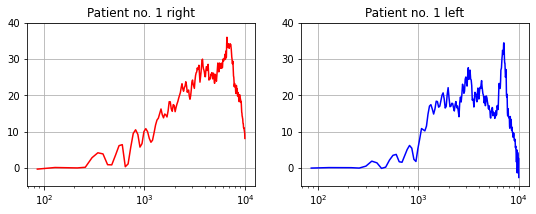

In [4]:
for patient_idx in range(len(text_files)):
    df = REM[patient_idx]

    freqs_s = list(df.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    id_right = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Right').values ))
    id_left = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Left').values ))
    
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,2)
    plt.semilogx(freqs,df.iloc[id_left,3:],'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(-5, 40)

    plt.subplot(1,2,1)
    plt.semilogx(freqs,df.iloc[id_right,3:],'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-5, 40)


## Target analysis - draft

In [5]:
def calculateBEARtarget(audiogram, profile):
    betas = dict()
    betas['A'] = np.array([[0, 0, 1, 5, 5, 3, 3],
                           [0, 0, -2, 0, 0, 0, 0],
                           [0, 0, -5, -5, -5, -5, -5]])
    betas['B'] = np.array([[-3, -3, 1, 5, 5, 7, 7],
                           [-3, -3, -2, 0, 0, 0, 0],
                           [-6, -6, -9, -9, -9, -9, -9]])
    betas['C'] = np.array([[-2, -1.3, 1, 4, 7, 7, 7],
                           [-10, -10, -5, 0, 0, 0, 0],
                           [-14, -14, -14, -14, -14, -14, -14]])
    betas['D'] = np.array([[0, 0, 0, 3, 2, 2, 2],
                           [-6, -6, -6, -3, -3, -3, -3],
                           [-10, -10, -10, -10, -14, -14, -14]])
    target = 0.31*np.array([audiogram, audiogram, audiogram]) + betas[profile]
    
    target[target < 0] = 0

    return target

<ipython-input-5-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0
<ipython-input-5-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0
<ipython-input-5-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0


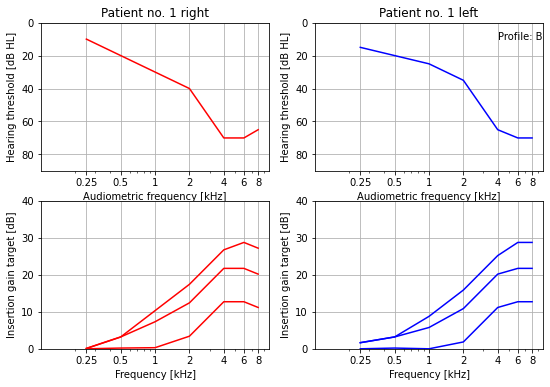

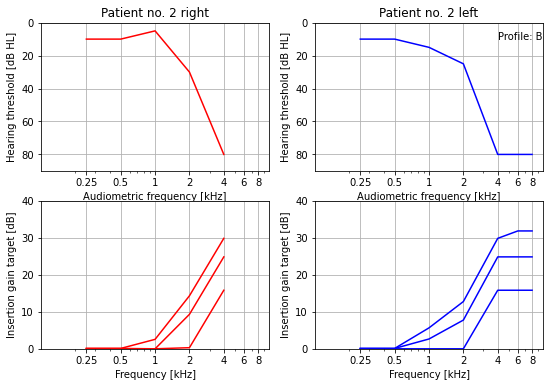

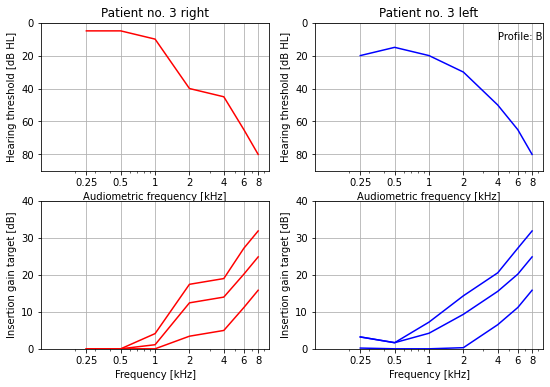

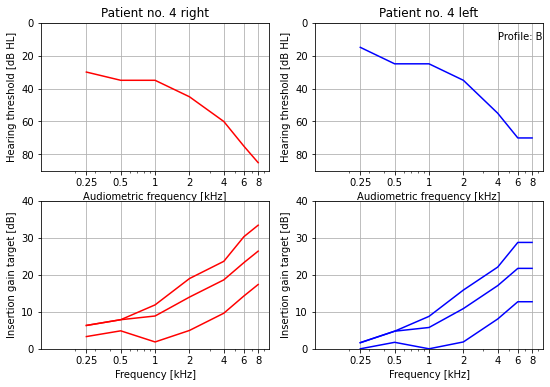

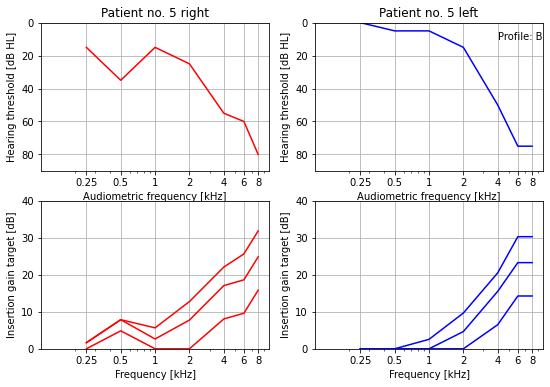

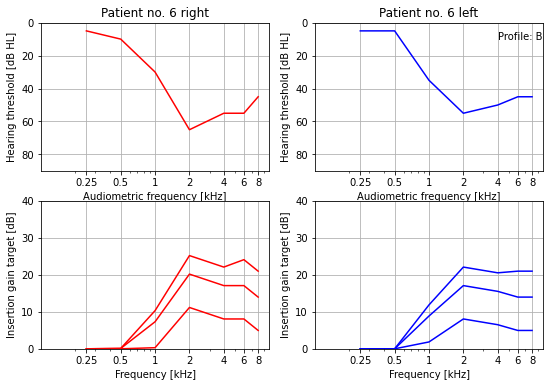

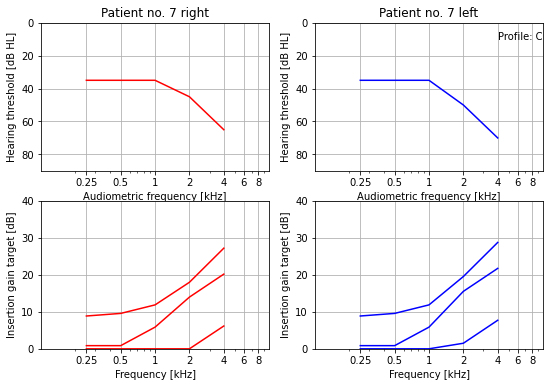

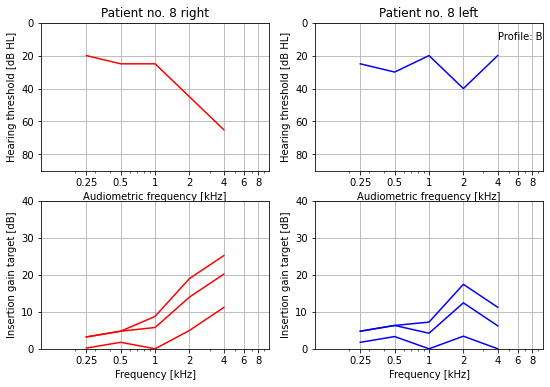

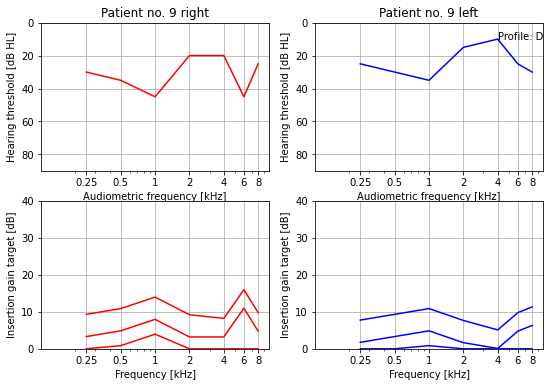

In [7]:
#path = '../../Data/data/'
# df = pd.read_excel(path+'WP4_Pilots_Data_OUH_GN.xlsx')

path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
df = pd.read_excel(path+'WP4 Pilots Data AUH_Widex.xlsx')

nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)
    
    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs_audio_no3k,target_right[0,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[1,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[2,:],'r')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs_audio_no3k,target_left[0,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[1,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[2,:],'b')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')


In [ ]:
#load the packages 
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile


## Now try to smooth the REM data 

In [9]:
#path = '../../Data/REM/WP4/'
path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/'

#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    print(REM[cnt])
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    cnt += 1
df_REM = pd.concat(REM_)



#smoothing 
np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')
#now load the smoothed data again (you need to run Smoothing_REM_input.m in Matlab in order to create the file)
df_REM.reset_index(inplace=True)
REM_smooth = pd.concat((df_REM.iloc[:,0:4], pd.read_csv(path + 'Smoothed_REM_WP4.csv', names= df_REM.loc[:,'86':'9976'].columns)),axis=1).iloc[:,1:]



C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-364-22 first fit.txt
                       RC_ID      Test    Ear        86       129       172  \
0   364-22_Widex_REM_fitting   REUG 70   Left  0.934812  0.751959  0.669501   
1   364-22_Widex_REM_fitting   REUG 70  Right -0.945158  0.148433  0.059383   
2   364-22_Widex_REM_fitting   REOG 70   Left  1.149983  0.983299  0.985662   
3   364-22_Widex_REM_fitting   REOG 70  Right -0.703155  0.415587  0.403250   
4   364-22_Widex_REM_fitting   REIG 65   Left -0.441994  0.101489  0.051773   
5   364-22_Widex_REM_fitting   REIG 65  Right -0.148913  0.074990 -0.257799   
6   364-22_Widex_REM_fitting   REIG 65   Left -0.070501  0.166394  0.224450   
7   364-22_Widex_REM_fitting   REIG 65  Right -0.046185  0.180111  0.075552   
8   364-22_Widex_REM_fitting   REIG 65   Left -0.210259  0.105849  0.151235   
9   364-22_Widex_REM_fitting   REIG 65  Right -0.288487  0.185884  0.155780   
10  364-22_Widex_REM_fitting   R

                       RC_ID     Test    Ear        86       129       172  \
0   364-40_Widex_REM_fitting  REUG 70   Left  1.258078  1.196036  0.220323   
1   364-40_Widex_REM_fitting  REUG 70  Right -2.614608 -5.519359 -3.037004   
2   364-40_Widex_REM_fitting  REOG 70   Left  1.347613  1.435864  0.567473   
3   364-40_Widex_REM_fitting  REOG 70  Right -2.523597 -5.189750 -2.596645   
4   364-40_Widex_REM_fitting  REIG 65   Left -0.415525 -0.094894 -0.392060   
5   364-40_Widex_REM_fitting  REIG 65  Right  1.630252  0.063896 -0.073506   
6   364-40_Widex_REM_fitting  REIG 65   Left -0.318939 -0.022620 -0.117580   
7   364-40_Widex_REM_fitting  REIG 65  Right  1.567405  0.063624  0.062637   
8   364-40_Widex_REM_fitting  REIG 65   Left -0.038012  0.013044 -0.100677   
9   364-40_Widex_REM_fitting  REIG 65  Right  1.779033  0.049633  0.061179   
10  364-40_Widex_REM_fitting  REIG 65   Left -0.068223  0.067093 -0.041986   
11  364-40_Widex_REM_fitting  REIG 65  Right  1.680351  0.112552

                       RC_ID      Test    Ear        86       129       172  \
0   364-94_Widex_REM_fitting   REUG 70   Left -0.727157  0.586678 -0.487881   
1   364-94_Widex_REM_fitting   REUG 70  Right -3.048879  0.679201 -0.135103   
2   364-94_Widex_REM_fitting   REOG 70   Left -0.446526  0.615760 -0.427072   
3   364-94_Widex_REM_fitting   REOG 70  Right -2.964144  0.585277 -0.184547   
4   364-94_Widex_REM_fitting   REIG 65   Left -0.738705  0.042923  0.050306   
5   364-94_Widex_REM_fitting   REIG 65  Right -2.346033 -0.170280 -0.156480   
6   364-94_Widex_REM_fitting   REIG 65   Left -0.409100  0.040781  0.065809   
7   364-94_Widex_REM_fitting   REIG 65  Right -1.963929 -0.111209 -0.101350   
8   364-94_Widex_REM_fitting   REIG 65   Left -1.135303  0.002935  0.031733   
9   364-94_Widex_REM_fitting   REIG 65  Right -2.868959 -0.181944 -0.141899   
10  364-94_Widex_REM_fitting   REIG 65   Left -0.343812  0.007854  0.035930   
11  364-94_Widex_REM_fitting   REIG 65  Right -1.981

Empty DataFrame
Columns: [RC_ID, Test, Ear, 86, 129, 172, 215, 258, 301, 344, 387, 430, 473, 516, 559, 602, 645, 688, 731, 774, 817, 860, 903, 946, 989, 1032, 1075, 1118, 1161, 1204, 1247, 1290, 1333, 1376, 1419, 1462, 1505, 1548, 1591, 1634, 1677, 1720, 1763, 1806, 1849, 1892, 1935, 1978, 2021, 2064, 2107, 2150, 2193, 2236, 2279, 2322, 2365, 2408, 2451, 2494, 2537, 2580, 2623, 2666, 2709, 2752, 2795, 2838, 2881, 2924, 2967, 3010, 3053, 3096, 3139, 3182, 3225, 3268, 3311, 3354, 3397, 3440, 3483, 3526, 3569, 3612, 3655, 3698, 3741, 3784, 3827, 3870, 3913, 3956, 3999, 4042, 4085, 4128, 4171, 4214, ...]
Index: []

[0 rows x 234 columns]
C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX_REM_ALL/WP4-365-0026 first fit.txt
                        RC_ID      Test    Ear        86       129       172  \
0   071268-0687_REM first fit   REUG 70  Right -0.725393  1.310561  0.199302   
1   071268-0687_REM first fit   REUG 70   Left  2.166361  1.060740  0.588018   
2   071268-0687_R

In [7]:
df_REM

,index,RC_ID,Test,Ear,86,129,172,215,258,301,...,9589,9632,9675,9718,9761,9804,9847,9890,9933,9976
0,0,364-22_Widex_REM_fitting,REUG 70,Left,0.934812,0.751959,0.669501,0.132409,-0.063562,-0.586246,...,-0.751003,0.636885,-0.261816,-1.252419,0.385549,3.524820,3.271396,1.924754,3.065306,10.132681
1,1,364-22_Widex_REM_fitting,REUG 70,Right,-0.945158,0.148433,0.059383,-0.645345,-1.176451,-1.528082,...,-6.096186,-6.207564,-5.881926,-5.927114,-5.473337,-5.296057,-5.051459,-5.080999,-5.325329,-1.379337
2,2,364-22_Widex_REM_fitting,REOG 70,Left,1.149983,0.983299,0.985662,0.447290,0.226682,-0.191558,...,-0.877424,-0.883779,-0.657696,-0.099940,0.289957,-0.679109,-1.135381,-1.185812,-2.031198,2.034870
3,3,364-22_Widex_REM_fitting,REOG 70,Right,-0.703155,0.415587,0.403250,-0.248766,-0.655630,-0.850026,...,-8.891817,-9.229672,-8.633722,-8.506826,-8.404817,-8.043224,-8.193450,-8.421419,-8.327441,-3.793895
4,4,364-22_Widex_REM_fitting,REIG 65,Left,-0.441994,0.101489,0.051773,-0.116115,-0.308470,1.281372,...,8.508622,6.342249,7.304470,9.591859,8.016535,2.910281,2.686485,4.920336,3.217231,-1.970755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,9,071268-0687_REM first fit,REIG 55,Left,-7.069526,0.080475,0.827873,0.896463,0.798294,1.363174,...,9.375242,8.842848,7.986968,7.503986,6.715030,6.935783,8.328929,10.277888,11.164424,9.465493
516,10,071268-0687_REM first fit,REIG 80,Right,-3.019800,0.578380,0.846329,1.536428,1.624299,1.826318,...,2.475068,1.951721,2.580335,3.182202,0.769140,-0.617178,-0.114214,2.003925,1.277274,-1.292804
517,11,071268-0687_REM first fit,REIG 80,Left,-0.541928,0.627378,1.153505,1.404746,1.312803,1.537665,...,-10.553155,-9.741334,-8.304100,-6.135635,-4.691626,-3.058424,-1.676768,0.525647,0.943291,-1.511301
518,12,071268-0687_REM first fit,LTASS 65,Right,-3.131150,1.728724,0.906586,0.596744,1.132518,0.981354,...,-1.802776,-2.557210,-2.324684,-2.113034,-3.074062,-4.310914,-3.951018,-3.308748,-3.130417,2.009326


## Try to plot both smoothed insertion gain and targets

22
26


<ipython-input-5-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0


28
34
36
40
66
74


<ipython-input-5-6a1bb12bee47>:17: RuntimeWarning: invalid value encountered in less
  target[target < 0] = 0


76
88
92
94


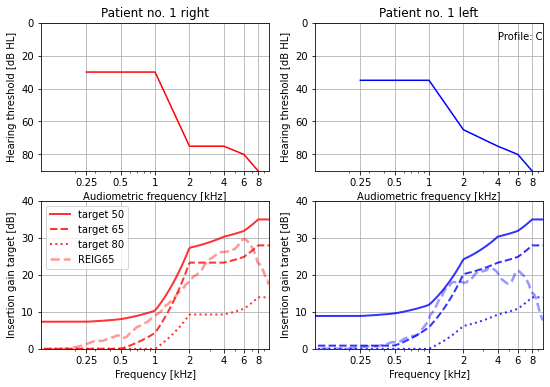

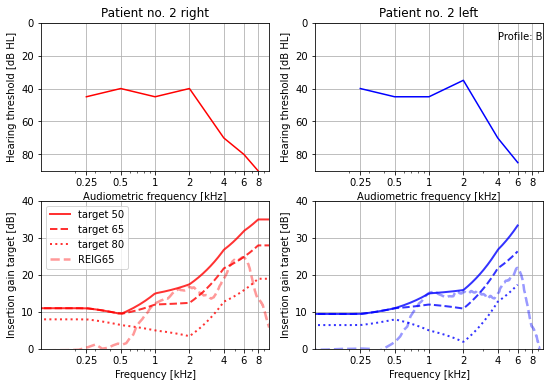

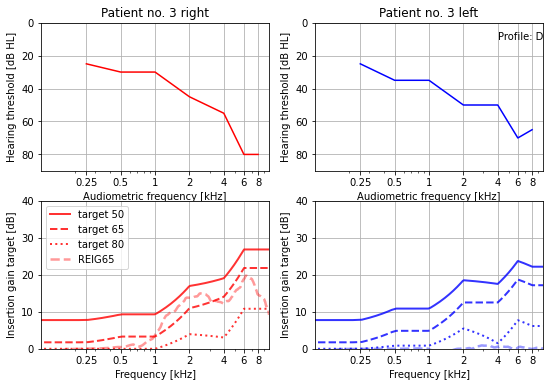

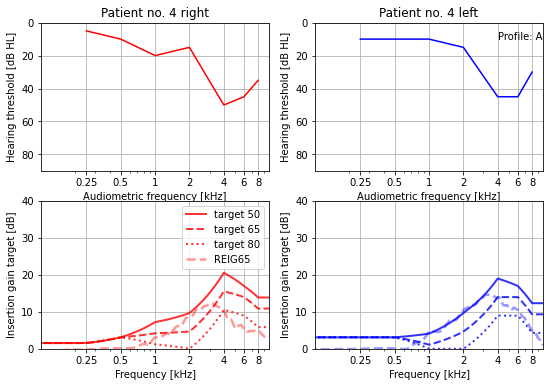

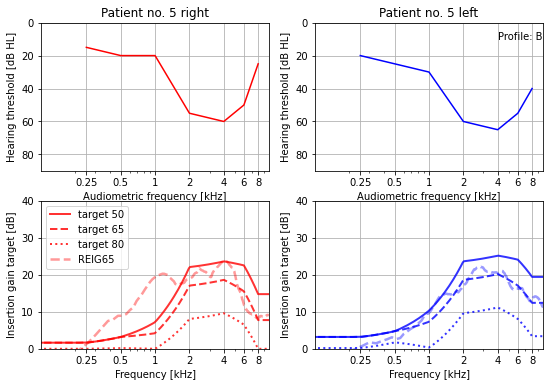

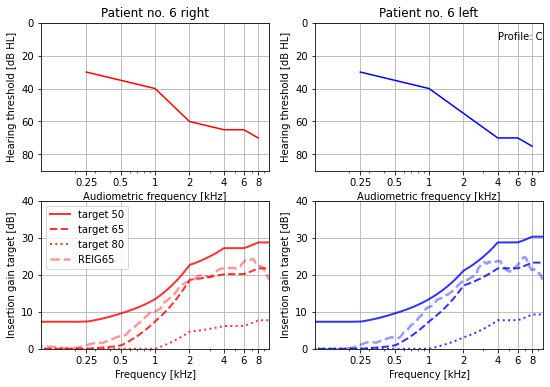

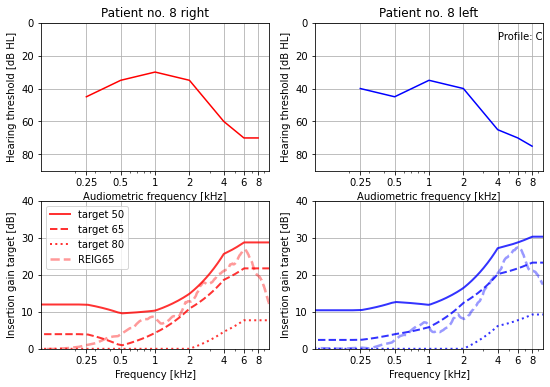

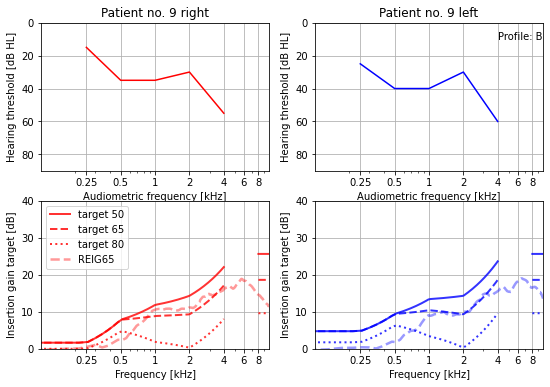

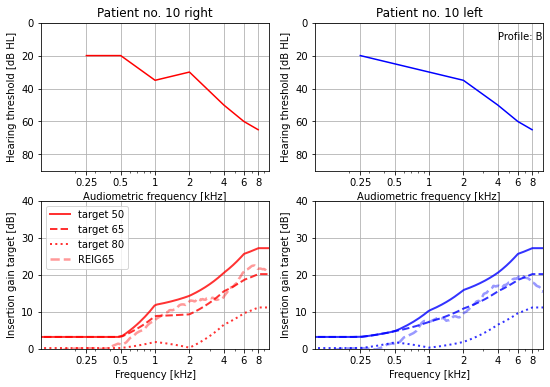

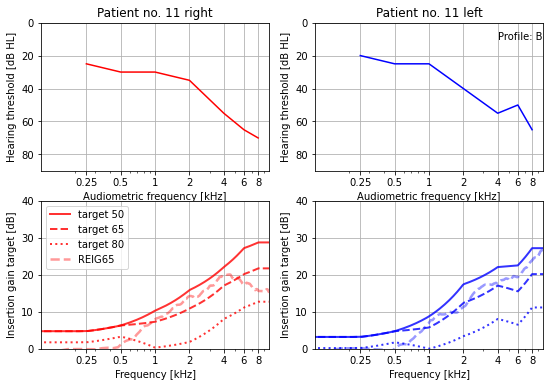

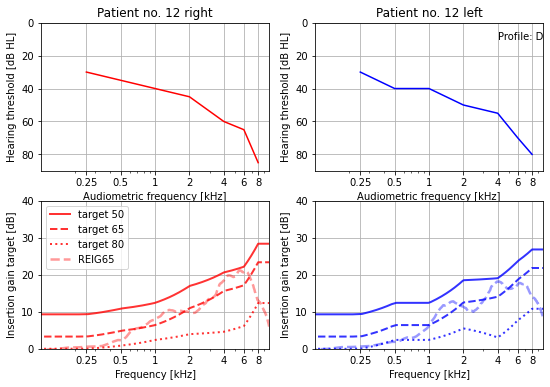

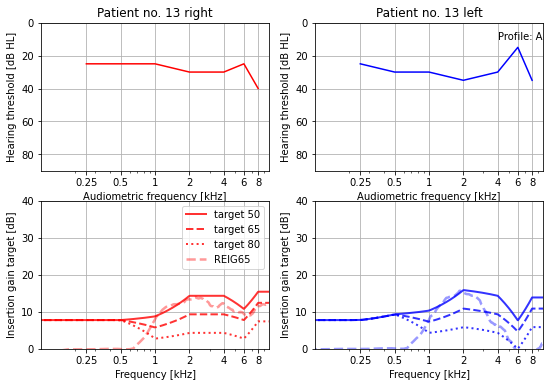

In [20]:
#path for other data 
#path = '../../Data/data/'
path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
#df = pd.read_excel(path + '')
df = pd.read_excel(path+'WP4 Pilots Data OUH_Widex.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)


    #now get the corresponding REM     
    df_ = REM_smooth[REM_smooth['RC_ID'].str.contains(df.iloc[patient_idx,0])]

    if(df_.empty):
        continue

    freqs_s = list(df_.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]
    
    # Find all REIG 65 for a given patient
    all_id_right = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Right').values )
    all_id_left  = np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Left').values )
    
    # Choose the max (or other value) of all the id_right and left
    id_right = np.max(all_id_right)
    id_left  = np.max(all_id_left)
        

    #interpolate the frequencies and values of the audiogram 
    target_left_ = []
    target_right_ = []
    for idx in range(3):
        target_left_.append(np.interp(freqs, freqs_audio_no3k, target_left[idx,:].astype('float64')))
        target_right_.append(np.interp(freqs, freqs_audio_no3k, target_right[idx,:].astype('float64')))

    target_left__ = np.array(target_left_)
    target_right__ = np.array(target_right_)
    

    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs,target_right__[0,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'solid',label='target 50')
    plt.semilogx(freqs,target_right__[1,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dashed',label='target 65')
    plt.semilogx(freqs,target_right__[2,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dotted',label='target 80')
    #REM 2 REIG65dB
    plt.semilogx(freqs,df_.iloc[id_right,3:],'r',linewidth=2.5,alpha=0.4,linestyle='dashed',label='REIG65')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    plt.legend()
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs,target_left__[0,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'solid')
    plt.semilogx(freqs,target_left__[1,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dashed')
    plt.semilogx(freqs,target_left__[2,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dotted')
    #REM @ REIG65dB
    plt.semilogx(freqs,df_.iloc[id_left,3:],'b',linewidth=2.5,alpha=0.4,linestyle='dashed')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    print(df.iloc[patient_idx,0][4:])
    
    # Conditional break for debugging
    if patient_idx+1 == 2:
        #break
        continue
        
    
    

In [15]:
print(df_)

                         RC_ID      Test    Ear        86      129       172  \
34    364-26_Widex_REM_fitting   REUG 70   Left  0.896770  0.60811 -0.083975   
35    364-26_Widex_REM_fitting   REUG 70  Right  0.265350  0.02611 -0.476480   
36    364-26_Widex_REM_fitting   REOG 70   Left  0.201910  0.15525 -0.104320   
37    364-26_Widex_REM_fitting   REOG 70  Right -0.655900 -0.56694 -0.496470   
38    364-26_Widex_REM_fitting   REOG 70   Left  1.013600  0.71705  0.012073   
..                         ...       ...    ...       ...      ...       ...   
515  071268-0687_REM first fit   REIG 55   Left -3.494500 -2.05370  0.650780   
516  071268-0687_REM first fit   REIG 80  Right -1.220700 -0.53170  1.146400   
517  071268-0687_REM first fit   REIG 80   Left  0.042725  0.41298  1.124600   
518  071268-0687_REM first fit  LTASS 65  Right -0.701210 -0.16528  1.091100   
519  071268-0687_REM first fit  LTASS 65   Left  0.984970  1.17940  1.235000   

         215      258      301      344

In [18]:
df.iloc[patient_idx,0][:]

'364-26'